In [1]:
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from IPython.display import clear_output
from sklearn.metrics import r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt

import data_parser
%matplotlib inline

In [6]:
# CUDA
if torch.cuda.is_available():
    dev = "cuda:0"
    print("CUDA avaiable")
else:  
    dev = "cpu"
    print("CUDA not avaiable")
device = torch.device(dev)

CUDA not avaiable


/public/home/zhanghf/.conda/envs/ONN/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
def plot_amplitude(df):
    
    index_list = list(dict.fromkeys(df.index.get_level_values(0)))
    #random.seed(42)
    np.random.shuffle(index_list)
    example_idx = index_list[0]
    
    fig, ax = plt.subplots(4, 4, figsize=(80, 20), constrained_layout=True)

    # not unwrapped
    for i in 1, 2, 3, 4:
        for j in 1, 2, 3, 4:
            amplitude_idx = 'A('+str(i)+','+str(j)+')'
            ax[i-1, j-1].plot(df.loc[example_idx]['F'], df.loc[example_idx][amplitude_idx])
            ax[i-1, j-1].set_xlabel('Frequency (Hz)')
            ax[i-1, j-1].set_ylabel('Amplitude')
            ax[i-1, j-1].set_title(amplitude_idx)

    figname = 'Amplitude_' + example_idx
    plt.savefig('../Figures/pdf/'+figname+'.pdf', bbox_inches= 'tight')
    plt.savefig('../Figures/png/'+figname+'.png', bbox_inches= 'tight')
    
    plt.show(); 

In [8]:
def plot_difference_between_unwrap(df, df_unwrap):
    
    index_list = list(dict.fromkeys(df.index.get_level_values(0)))
    # random.seed(42)
    np.random.shuffle(index_list)
    example_idx = index_list[0]
    
    fig, ax = plt.subplots(8, 4, figsize=(80, 40), constrained_layout=True)

    # not unwrapped
    for i in 1, 2, 3, 4:
        for j in 1, 2, 3, 4:
            phase_idx = 'P('+str(i)+','+str(j)+')'
            ax[i-1, j-1].plot(df.loc[example_idx]['F'], df.loc[example_idx][phase_idx])
            ax[i-1, j-1].set_xlabel('Frequency (Hz)')
            ax[i-1, j-1].set_ylabel('Phase')
            ax[i-1, j-1].set_title(phase_idx+' wrapped')
    
    # unwrapped
    for i in 1, 2, 3, 4:
        for j in 1, 2, 3, 4:
            phase_idx = 'P('+str(i)+','+str(j)+')'
            ax[i+3, j-1].plot(df_unwrap.loc[example_idx]['F'], df_unwrap.loc[example_idx][phase_idx])
            ax[i+3, j-1].set_xlabel('Frequency (Hz)')
            ax[i+3, j-1].set_ylabel('Phase')
            ax[i+3, j-1].set_title(phase_idx+' unwrapped')
    
    figname = 'Wrap_vs_Unwrap_' + example_idx
    plt.savefig('../Figures/pdf/'+figname+'.pdf', bbox_inches= 'tight')
    plt.savefig('../Figures/png/'+figname+'.png', bbox_inches= 'tight')
    
    plt.show(); 

In [9]:
def plot_fft_example(df):
    
    index_list = ['4d80d21000', '4d80d22000', '4d80d23000', '4d80d25000']
    
    #### Amplitude ####
    fig, ax = plt.subplots(4, 4, figsize=(40, 20), constrained_layout=True)
    
    y_idx = 'A(1,1)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[0, plt_i].plot(freqs, p)
        ax[0, plt_i].set_xlabel('1 / Frequency')
        ax[0, plt_i].set_ylabel('Power')
        ax[0, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    y_idx = 'A(1,2)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[1, plt_i].plot(freqs, p)
        ax[1, plt_i].set_xlabel('1 / Frequency')
        ax[1, plt_i].set_ylabel('Power')
        ax[1, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1

    y_idx = 'A(1,3)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[2, plt_i].plot(freqs, p)
        ax[2, plt_i].set_xlabel('1 / Frequency')
        ax[2, plt_i].set_ylabel('Power')
        ax[2, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    y_idx = 'A(1,4)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[3, plt_i].plot(freqs, p)
        ax[3, plt_i].set_xlabel('1 / Frequency')
        ax[3, plt_i].set_ylabel('Power')
        ax[3, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    figname = 'FFT_example_Amp'
    plt.savefig('../Figures/pdf/'+figname+'.pdf', bbox_inches= 'tight')
    plt.savefig('../Figures/png/'+figname+'.png', bbox_inches= 'tight')
    
    #### Phase ####
    fig, ax = plt.subplots(4, 4, figsize=(40, 20), constrained_layout=True)
    
    y_idx = 'P(1,1)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[0, plt_i].plot(freqs, p)
        ax[0, plt_i].set_xlabel('1 / Frequency')
        ax[0, plt_i].set_ylabel('Power')
        ax[0, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    y_idx = 'P(1,2)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[1, plt_i].plot(freqs, p)
        ax[1, plt_i].set_xlabel('1 / Frequency')
        ax[1, plt_i].set_ylabel('Power')
        ax[1, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1

    y_idx = 'P(1,3)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[2, plt_i].plot(freqs, p)
        ax[2, plt_i].set_xlabel('1 / Frequency')
        ax[2, plt_i].set_ylabel('Power')
        ax[2, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    y_idx = 'P(1,4)'
    plt_i = 0
    for example_idx in index_list:
        
        dt = 2e8
        X = df.loc[example_idx]['F']
        y = df.loc[example_idx][y_idx]
        # Compute Fourier transform by numpy's FFT function
        g = np.fft.fft(y)
        p = np.abs(g)
        w = np.fft.fftfreq(y.size, d=dt)
        
        
        mask = np.where(w > 0)
        freqs = w[mask]
        p = p[mask]

        ax[3, plt_i].plot(freqs, p)
        ax[3, plt_i].set_xlabel('1 / Frequency')
        ax[3, plt_i].set_ylabel('Power')
        ax[3, plt_i].set_title('FFT of ' + y_idx + ' W=4.8, Trap=0.2, Length=%d' %(df.loc[example_idx]['Length'][0].astype(int)))
        plt_i += 1
        
    figname = 'FFT_example_Phase'
    plt.savefig('../Figures/pdf/'+figname+'.pdf', bbox_inches= 'tight')
    plt.savefig('../Figures/png/'+figname+'.png', bbox_inches= 'tight')
    

In [10]:
def fft_transform(df, example_idx, y_idx, top_k, debug=False):
    
    dt = 2e8
    
    X = df.loc[example_idx]['F']
    y = df.loc[example_idx][y_idx]
    # Compute Fourier transform by numpy's FFT function
    g = np.fft.fft(y)
    p = np.abs(g)
    w = np.fft.fftfreq(y.size, d=dt)
        
    mask = np.where(w > 0)
    freqs = w[mask]
    p = p[mask]
    
    if debug:
        plt.plot(freqs, p)
    
    top_k_idxs = np.argpartition(p, -top_k)[-top_k:]
    top_k_power = p[top_k_idxs]
    fft_periods = (1 / freqs[top_k_idxs])
    
    return fft_periods / 1e9
    
def calculate_period(df, y_idx):
    periods_dict = {}
    index_list = list(dict.fromkeys(df.index.get_level_values(0)))
    for idx in index_list:
        L = df.loc[idx]['Length'][0]
        period = np.mean(fft_transform(df, idx, y_idx, 1))
        if L in periods_dict:
            periods_dict[L].append(period)
        else:
            periods_dict[L] = [period]
        # print("L %d F %.4f" % (L.astype(int), period))
    return periods_dict

def get_most_common_period(df_unwrap, y_idx):
    L = np.arange(1000.0, 5200.0, 200.0)
    periods_dict = calculate_period(df_unwrap, y_idx)
    p = []
    for l in L:
        u, indices = np.unique(periods_dict[l], return_inverse=True)
        p.append(u[np.argmax(np.bincount(indices))])
    return p

def plot_L_p(df_unwrap, y_idx_list):
    
    L = np.arange(1000.0, 5200.0, 200.0)
    p_dict = {}
    for y_idx in y_idx_list:
        periods_dict = calculate_period(df_unwrap, y_idx)
        p_dict[y_idx] = []
        for l in L:
            u, indices = np.unique(periods_dict[l], return_inverse=True)
            p_dict[y_idx].append(u[np.argmax(np.bincount(indices))])
    
    fig, ax = plt.subplots(len(y_idx_list), figsize=(20, len(y_idx_list)*5), constrained_layout=True)
    plt_i = 0
    for p in p_dict:
        ax[plt_i].plot(L, p_dict[p])
        ax[plt_i].set_xlabel('Length (mil)')
        ax[plt_i].set_ylabel('Significant Period (GHz)')
        ax[plt_i].set_title(p)
        plt_i += 1
        
    figname = 'Period_to_Length'
    plt.savefig('../Figures/pdf/'+figname+'.pdf', bbox_inches= 'tight')
    plt.savefig('../Figures/png/'+figname+'.png', bbox_inches= 'tight')
    plt.show();

In [11]:
df = data_parser.calculate_amp_phase(data_parser.data_parse(), unwrap=False)


In [2]:
df_unwrap = data_parser.calculate_amp_phase(data_parser.data_parse())

In [4]:
df_unwrap['P(1,3)']

4d80d23000  0        0.000000
            1       -0.615371
            2       -1.216738
            3       -1.812328
            4       -2.407254
                      ...    
5d60d23800  496   -369.276840
            497   -370.019043
            498   -370.761668
            499   -371.504215
            500   -372.246323
Name: P(1,3), Length: 220941, dtype: float64

In [ ]:
plot_L_p(df_unwrap, ['A(1,1)', 'A(1,2)','P(1,1)','P(1,2)'])

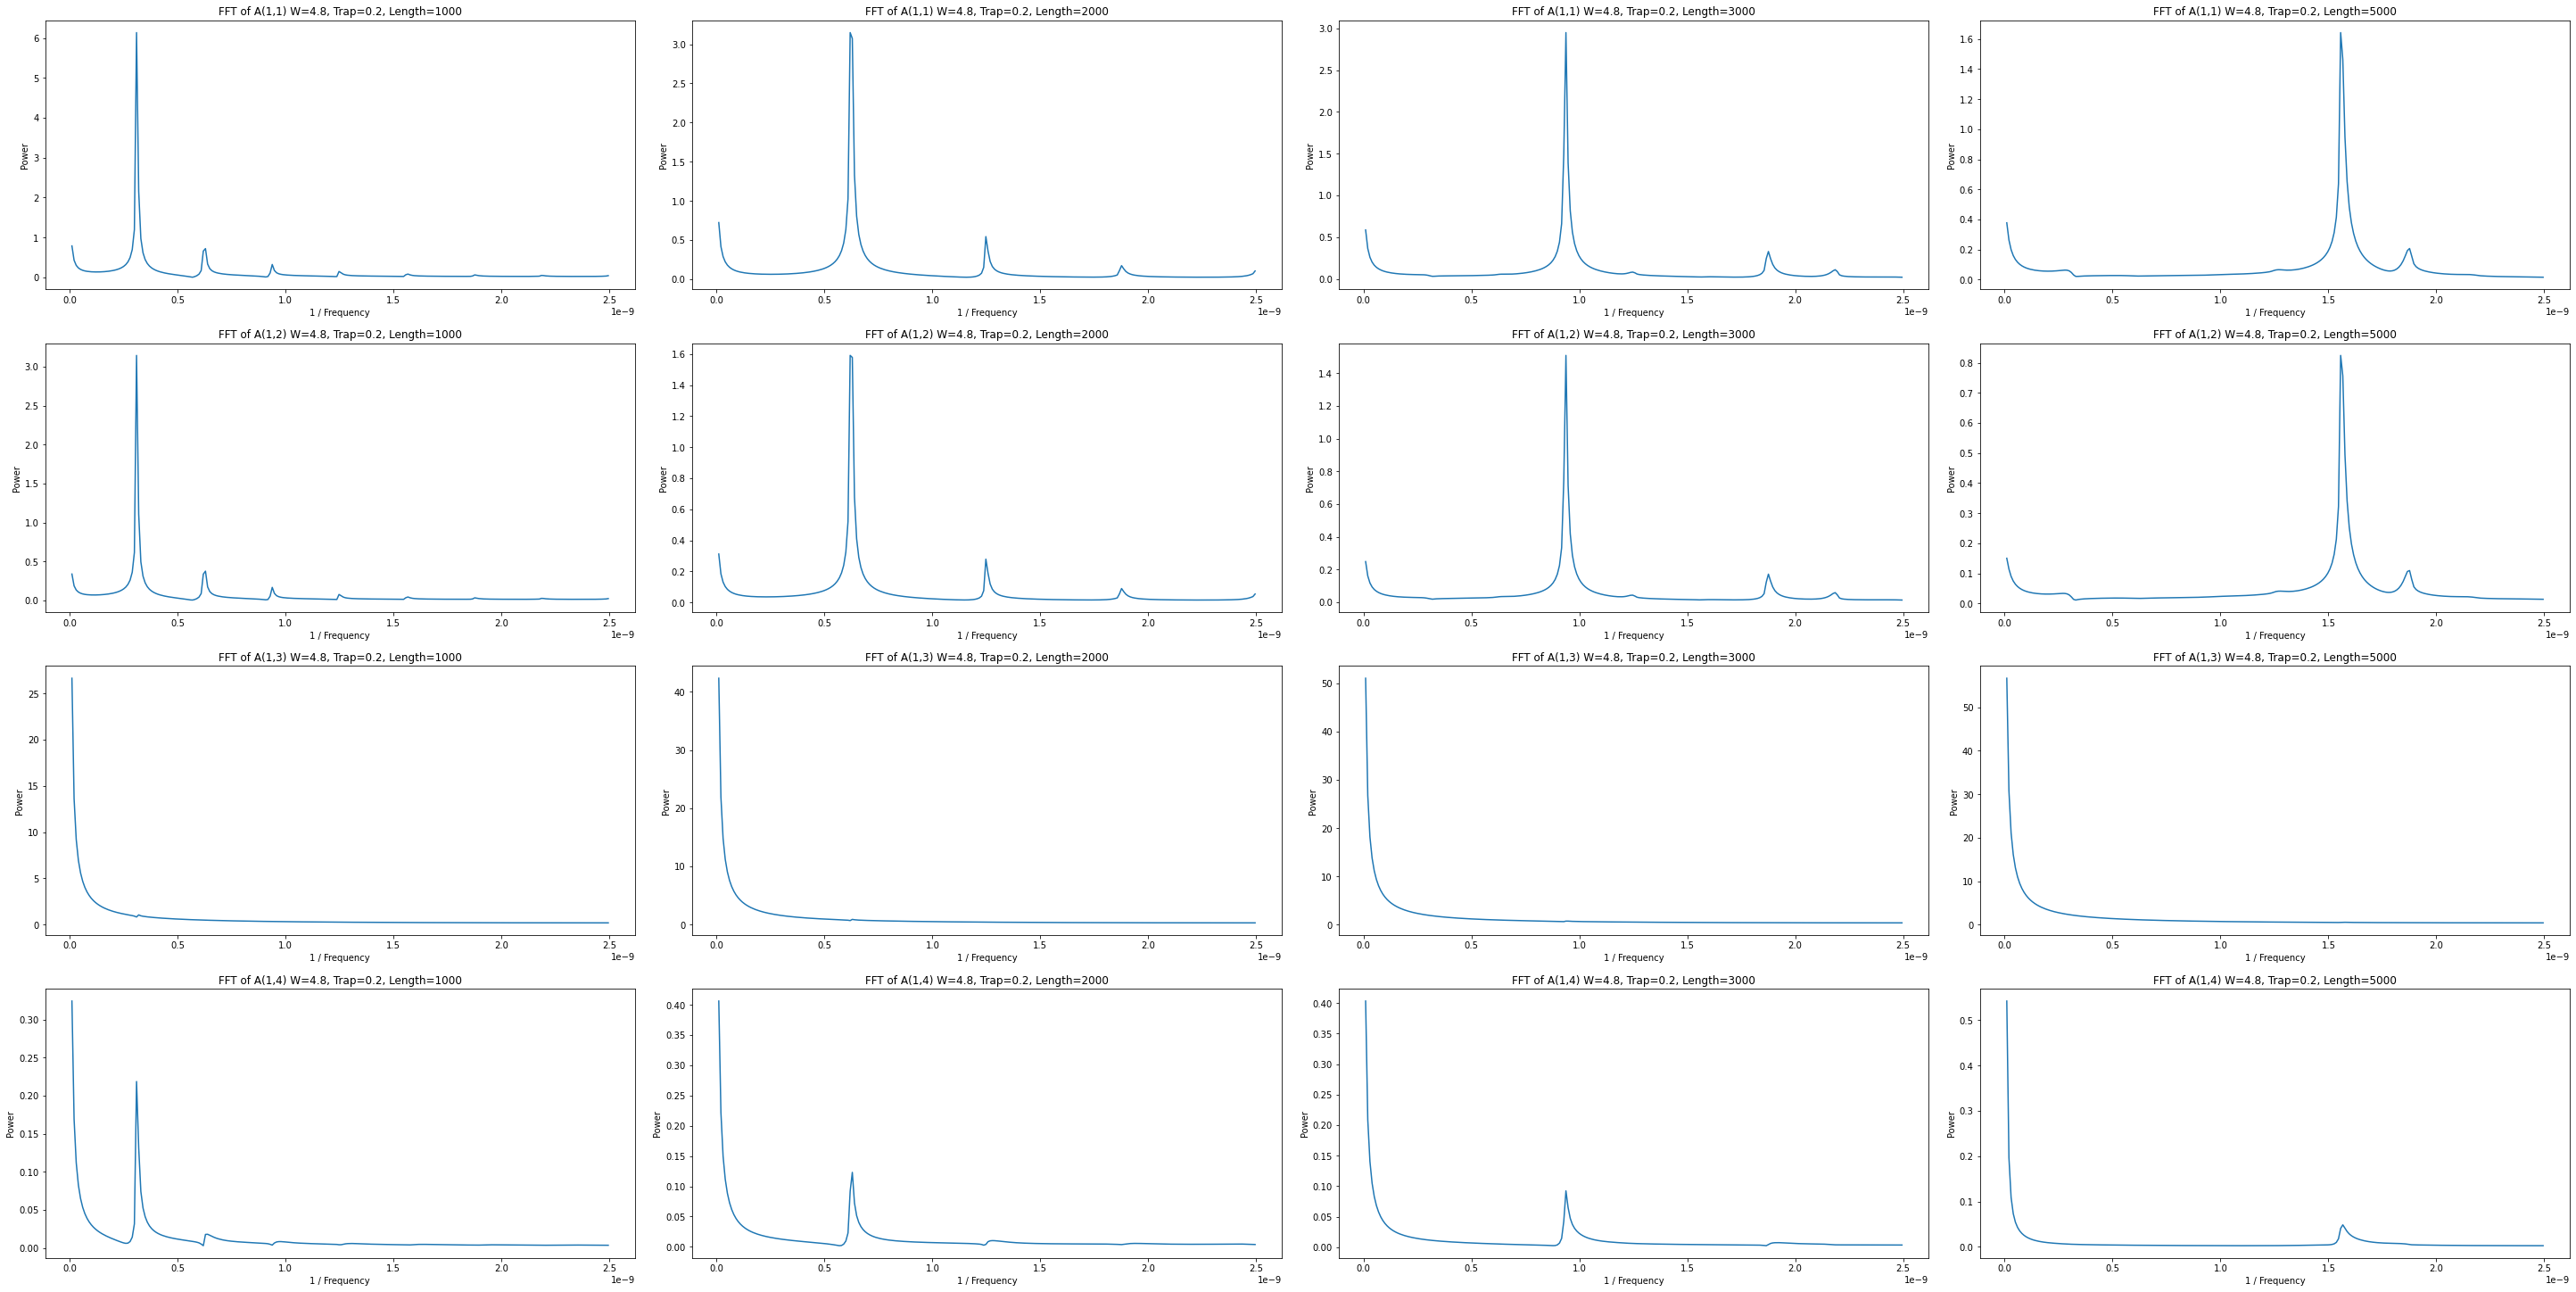

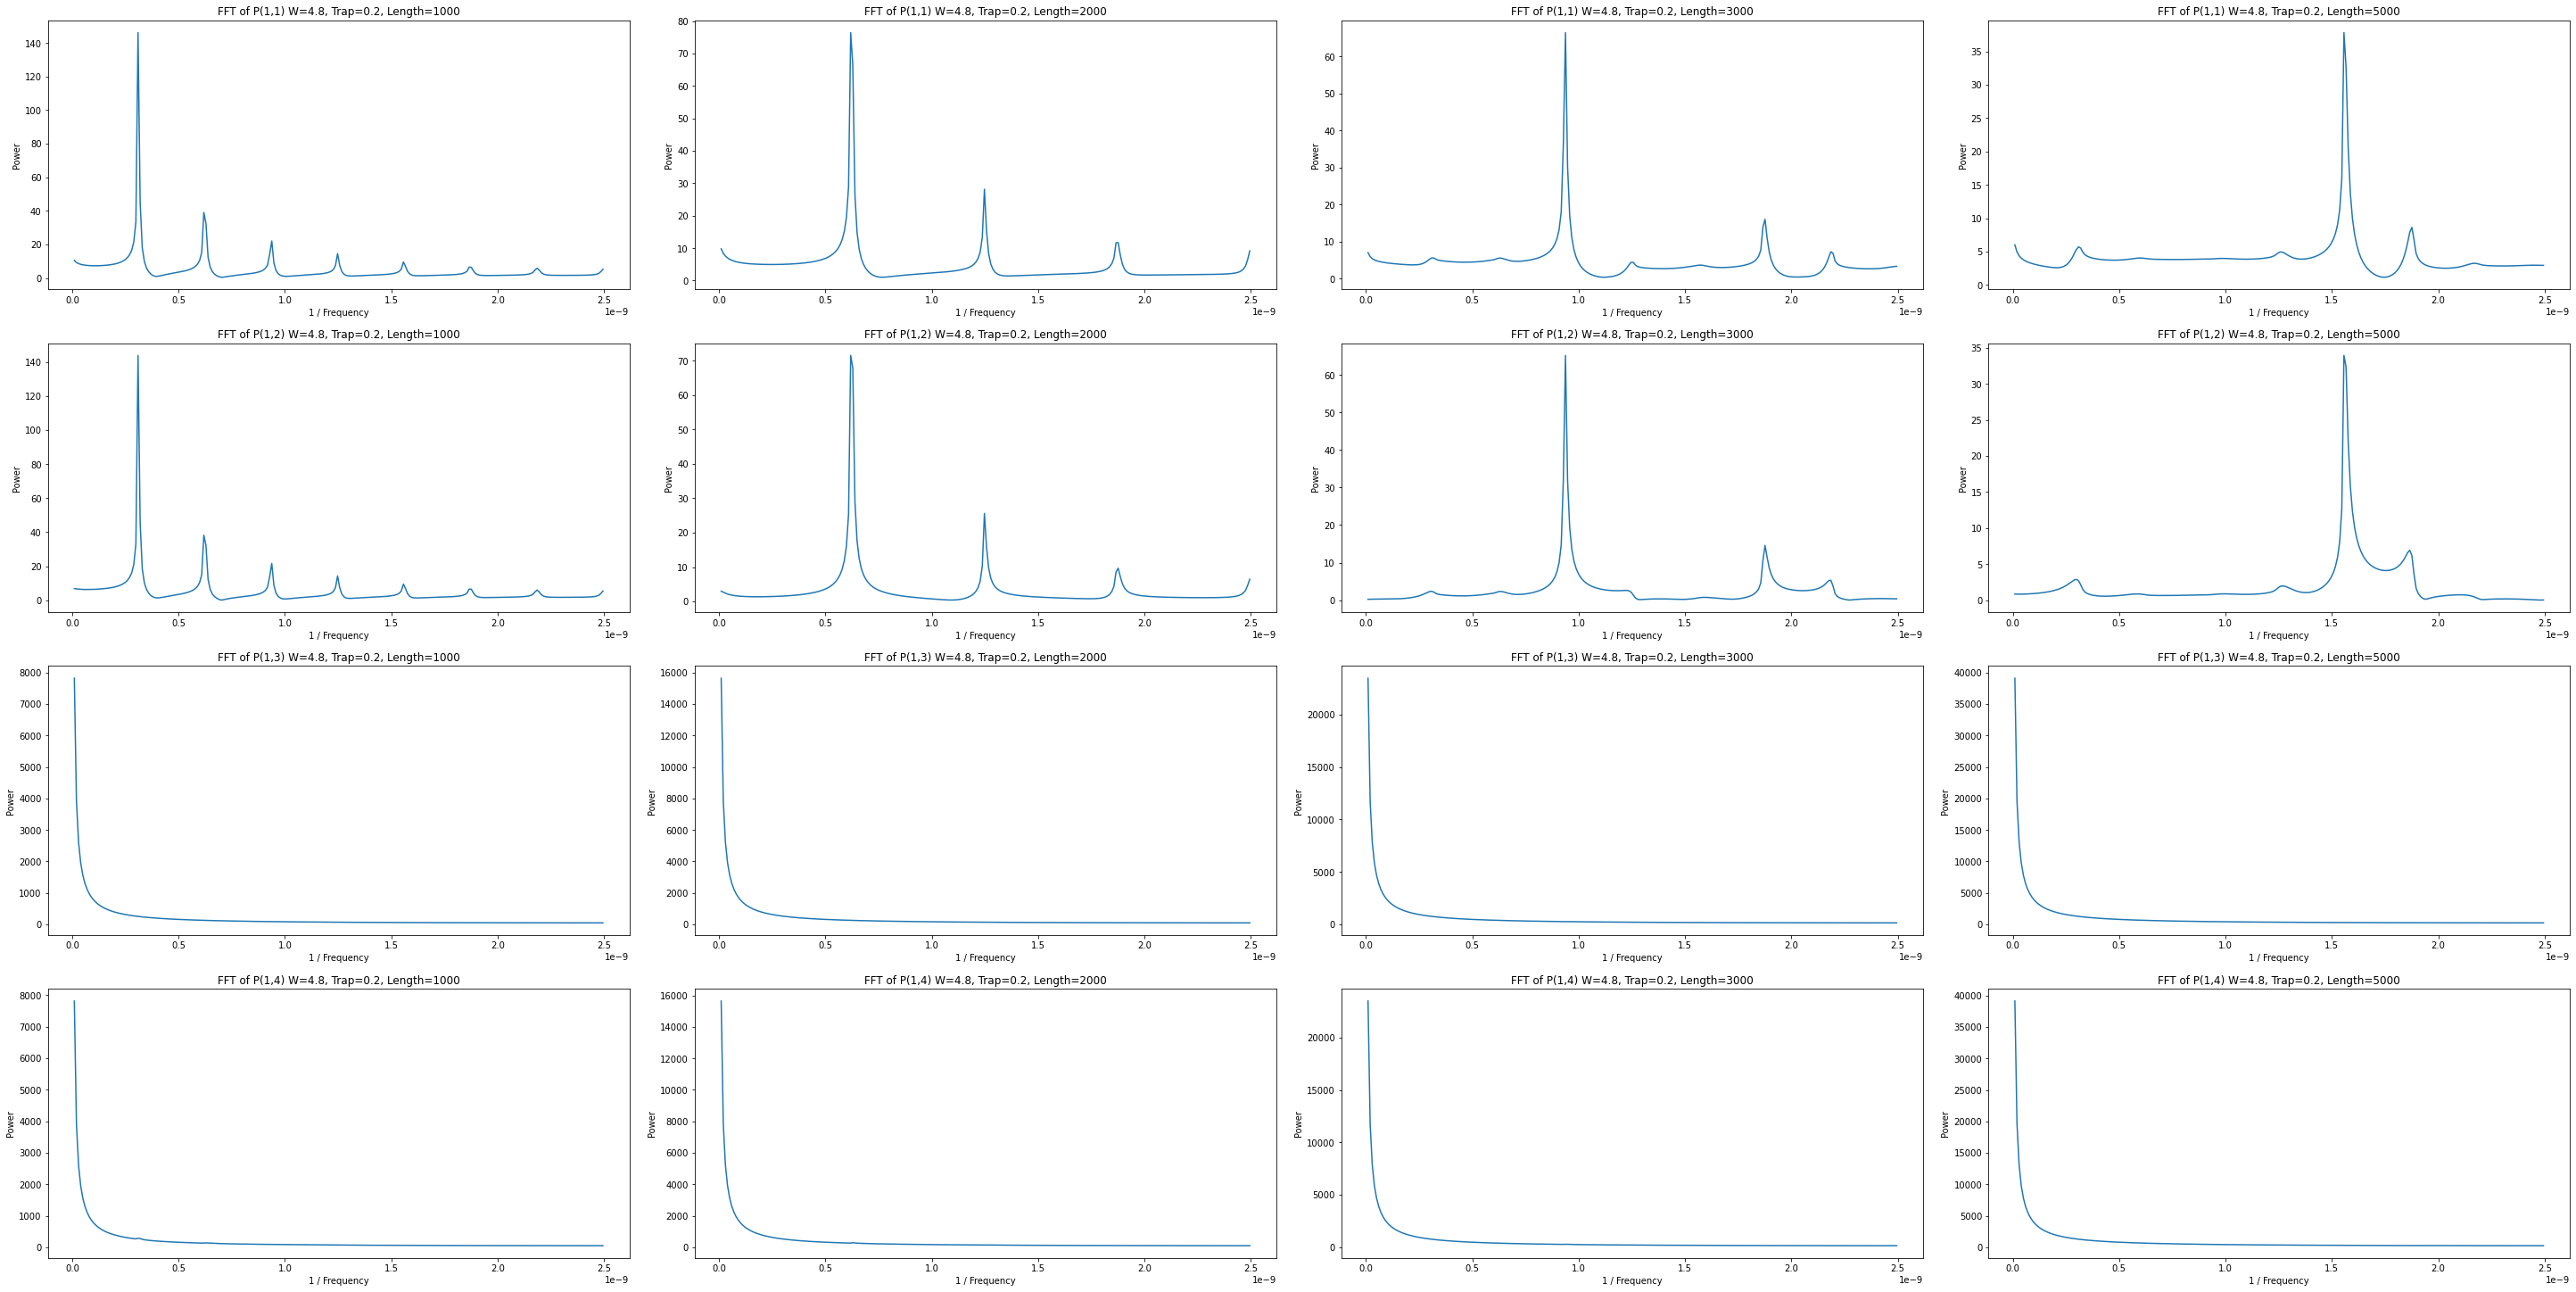

In [12]:
plot_fft_example(df_unwrap)

In [ ]:
index_list = list(dict.fromkeys(df.index.get_level_values(0)))

In [ ]:
index_list

In [ ]:
fft_transform(df_unwrap, '4d80d23000', 'A(1,2)', 3, debug=True)

# A(1,1) frequency


In [ ]:
periods_dict = calculate_period(df_unwrap, 'A(1,1)')
periods_dict

In [ ]:
p = get_most_common_period(df_unwrap, 'A(1,1)')
for i in p:
    print (int(i * 100)/100)

In [ ]:
plot_difference_between_unwrap(df, df_unwrap)

In [ ]:
plot_amplitude(df)

In [ ]:
# print several cases of SA(1,1) to SA(4,4), SP(1,1) to SP(4,4)
# print difference between SA(1,2) SA(2,1)

# (1,1) (2,2) (3,3) (4,4)
# cpd.concat(np.abs(df['A(1,1)'] - df['A(2,2)']), np.abs(df['A(2,2)'] - df['A(3,3)']), np.abs(df['A(3,3)'] - df['A(4,4)']))
d_a = []

d_a.append(np.max(np.abs(df['A(1,1)'] - df['A(2,2)']) / df['A(2,2)']))
d_a.append(np.max(np.abs(df['A(2,2)'] - df['A(3,3)']) / df['A(3,3)']))
d_a.append(np.max(np.abs(df['A(3,3)'] - df['A(4,4)']) / df['A(4,4)']))
d_a.append(np.max(np.abs(df['A(4,4)'] - df['A(1,1)']) / df['A(1,1)']))

d_a.append(np.max(np.abs(df['A(1,2)'] - df['A(2,1)']) / df['A(2,1)']))
d_a.append(np.max(np.abs(df['A(2,1)'] - df['A(3,4)']) / df['A(3,4)']))
d_a.append(np.max(np.abs(df['A(3,4)'] - df['A(4,3)']) / df['A(4,3)']))
d_a.append(np.max(np.abs(df['A(4,3)'] - df['A(1,2)']) / df['A(1,2)']))

d_a.append(np.max(np.abs(df['A(1,3)'] - df['A(2,4)']) / df['A(2,4)']))
d_a.append(np.max(np.abs(df['A(2,4)'] - df['A(3,1)']) / df['A(3,1)']))
d_a.append(np.max(np.abs(df['A(3,1)'] - df['A(4,2)']) / df['A(4,2)']))
d_a.append(np.max(np.abs(df['A(4,2)'] - df['A(1,3)']) / df['A(1,3)']))

d_a.append(np.max(np.abs(df['A(1,4)'] - df['A(2,3)']) / df['A(2,3)']))
d_a.append(np.max(np.abs(df['A(2,3)'] - df['A(3,2)']) / df['A(3,2)']))
d_a.append(np.max(np.abs(df['A(3,2)'] - df['A(4,1)']) / df['A(4,1)']))
d_a.append(np.max(np.abs(df['A(4,1)'] - df['A(1,4)']) / df['A(1,4)']))


d_p = []
d_p.append(np.max(np.abs(df_unwrap['P(1,1)'] - df_unwrap['P(2,2)']) / df_unwrap['P(2,2)']))
d_p.append(np.max(np.abs(df_unwrap['P(2,2)'] - df_unwrap['P(3,3)']) / df_unwrap['P(3,3)']))
d_p.append(np.max(np.abs(df_unwrap['P(3,3)'] - df_unwrap['P(4,4)']) / df_unwrap['P(4,4)']))
d_p.append(np.max(np.abs(df_unwrap['P(4,4)'] - df_unwrap['P(1,1)']) / df_unwrap['P(1,1)']))

d_p.append(np.max(np.abs(df_unwrap['P(1,2)'] - df_unwrap['P(2,1)']) / df_unwrap['P(2,1)']))
d_p.append(np.max(np.abs(df_unwrap['P(2,1)'] - df_unwrap['P(3,4)']) / df_unwrap['P(3,4)']))
d_p.append(np.max(np.abs(df_unwrap['P(3,4)'] - df_unwrap['P(4,3)']) / df_unwrap['P(4,3)']))
d_p.append(np.max(np.abs(df_unwrap['P(4,3)'] - df_unwrap['P(1,2)']) / df_unwrap['P(1,2)']))

d_p.append(np.max(np.abs(df_unwrap['P(1,3)'] - df_unwrap['P(2,4)']) / df_unwrap['P(2,4)']))
d_p.append(np.max(np.abs(df_unwrap['P(2,4)'] - df_unwrap['P(3,1)']) / df_unwrap['P(3,1)']))
d_p.append(np.max(np.abs(df_unwrap['P(3,1)'] - df_unwrap['P(4,2)']) / df_unwrap['P(4,2)']))
d_p.append(np.max(np.abs(df_unwrap['P(4,2)'] - df_unwrap['P(1,3)']) / df_unwrap['P(1,3)']))

d_p.append(np.max(np.abs(df_unwrap['P(1,4)'] - df_unwrap['P(2,3)']) / df_unwrap['P(2,3)']))
d_p.append(np.max(np.abs(df_unwrap['P(2,3)'] - df_unwrap['P(3,2)']) / df_unwrap['P(3,2)']))
d_p.append(np.max(np.abs(df_unwrap['P(3,2)'] - df_unwrap['P(4,1)']) / df_unwrap['P(4,1)']))
d_p.append(np.max(np.abs(df_unwrap['P(4,1)'] - df_unwrap['P(1,4)']) / df_unwrap['P(1,4)']))


In [ ]:
d_a

In [ ]:
d_p

In [ ]:
idx_list

In [ ]:
index_list = list(dict.fromkeys(df.index.get_level_values(0)))
df.loc[index_list[0]]['A(1,1)']